In [1]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikhaily","key":"e566853c8e415ee9a7094aa240eeb156"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sujaykapadnis/young-adult-migration-patterns
!unzip young-adult-migration-patterns.zip

 96% 263M/273M [00:02<00:00, 102MB/s]
100% 273M/273M [00:02<00:00, 97.9MB/s]
Archive:  young-adult-migration-patterns.zip
  inflating: Data Dictionary.pdf     
  inflating: od.csv                  
  inflating: od_inc.csv              
  inflating: od_pooled.csv           
  inflating: od_race.csv             


In [4]:
def format_memory_usage(num, suffix='B'):
    for unit in ['', 'K', 'M', 'G', 'T', 'P', 'E', 'Z']:
        if abs(num) < 1024.0:
            return f"{num:.1f} {unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f} Yi{suffix}"

In [5]:
def format_elapsed_time(elapsed_time):
    minutes, seconds = divmod(elapsed_time, 60)
    return f'{int(minutes):02d}:{int(seconds):02d}'

In [6]:
def format_cpu_usage(cpu_usage):
    return f'{cpu_usage:.2f}%'

In [11]:
results = {'Tradisional Way':[]}

In [9]:
# import pandas
import pandas as pd

# Import time module
import time

# Import psutil
import psutil
import os

In [12]:
# Record start time
start_time = time.time()

# Reading the data
df = pd.read_csv("od.csv")

# Calculate the CPU usage
cpu_usage = format_cpu_usage(psutil.cpu_percent(interval=1))

# Calculate the memory usage
memory_usage = format_memory_usage(df.memory_usage(deep=True).sum())

# Calculate the elapsed time
elapsed_time = format_elapsed_time(time.time() - start_time)

# Add the result to the dictionary
results['Tradisional Way'].append((memory_usage, cpu_usage, elapsed_time))

# print the difference between start
# and end time in seconds
print(results['Tradisional Way'])

[('4.9 GB', '26.00%', '00:29')]


In [13]:
%time df

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 19.3 µs


,o_cz,o_cz_name,o_state_name,d_cz,d_cz_name,d_state_name,n,n_tot_o,n_tot_d,pool,pr_d_o,pr_o_d
0,100,Johnson City,Tennessee,10000,Panama City,Florida,0,36,44,AsianQ1,0.000000,0.000000
1,100,Johnson City,Tennessee,31303,Kerrville,Texas,0,36,2,AsianQ1,0.000000,0.000000
2,100,Johnson City,Tennessee,10600,Jasper,Alabama,0,36,6,AsianQ1,0.000000,0.000000
3,100,Johnson City,Tennessee,2600,Roanoke Rapids,North Carolina,0,36,8,AsianQ1,0.000000,0.000000
4,100,Johnson City,Tennessee,11402,Marinette,Michigan,0,36,5,AsianQ1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
13727020,39400,Seattle,Washington,22800,Eau Claire,Wisconsin,1,96029,4638,WhiteQ5,0.000010,0.000216
13727021,39400,Seattle,Washington,16500,Erie,Pennsylvania,7,96029,5811,WhiteQ5,0.000073,0.001205
13727022,39400,Seattle,Washington,33601,Lawton,Oklahoma,11,96029,1806,WhiteQ5,0.000115,0.006091
13727023,39400,Seattle,Washington,38601,Spokane,Washington,924,96029,11179,WhiteQ5,0.009622,0.082655


In [15]:
%time df.isna().sum()

CPU times: user 9.91 s, sys: 53.6 ms, total: 9.96 s
Wall time: 9.95 s


o_cz                 0
o_cz_name            0
o_state_name         0
d_cz                 0
d_cz_name            0
d_state_name         0
n                    0
n_tot_o              0
n_tot_d              0
pool                 0
pr_d_o          587613
pr_o_d          601692
dtype: int64

In [16]:
 # drop 'pr_d_o' and 'pr_o_d' columns

start_time_info = time.time()
df.drop('pr_d_o', axis=1, inplace=True)
df.drop('pr_o_d', axis=1, inplace=True)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 4.16 seconds


In [17]:
start_time_info = time.time()
df.info()
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727025 entries, 0 to 13727024
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   o_cz          int64 
 1   o_cz_name     object
 2   o_state_name  object
 3   d_cz          int64 
 4   d_cz_name     object
 5   d_state_name  object
 6   n             int64 
 7   n_tot_o       int64 
 8   n_tot_d       int64 
 9   pool          object
dtypes: int64(5), object(5)
memory usage: 1.0+ GB

Time taken to run the info operation: 1.58 seconds


In [18]:
# change 'o_cz_name' from object to categorical

start_time_info = time.time()
df['o_cz_name'] = df['o_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 1.95 seconds


In [19]:
# change 'o_state_name' from object to categorical

start_time_info = time.time()
df['o_state_name'] = df['o_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 2.36 seconds


In [20]:
# change 'd_cz_name' from object to categorical

start_time_info = time.time()
df['d_cz_name'] = df['d_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 2.70 seconds


In [21]:
# change 'd_state_name' from object to categorical

start_time_info = time.time()
df['d_state_name'] = df['d_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 3.42 seconds


In [22]:
# change 'pool' from object to categorical

start_time_info = time.time()
df['pool'] = df['pool'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 3.75 seconds


In [27]:
# change the datatype 'o_cz' from int64 to int32

start_time_info = time.time()
df['o_cz'] = df['o_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.05 seconds


In [26]:
# change the datatype 'd_cz' from int64 to int32

start_time_info = time.time()
df['d_cz'] = df['d_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.10 seconds


In [25]:
# change the datatype 'n' from int64 to int32

start_time_info = time.time()
df['n'] = df['n'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.15 seconds


In [24]:
# change the datatype 'n_tot_o' from int64 to int32

start_time_info = time.time()
df['n_tot_o'] = df['n_tot_o'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.23 seconds


In [23]:
# change the datatype 'n_tot_d' from int64 to int32

start_time_info = time.time()
df['n_tot_d'] = df['n_tot_d'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.58 seconds


In [28]:
df['n'].sum()

31434476

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

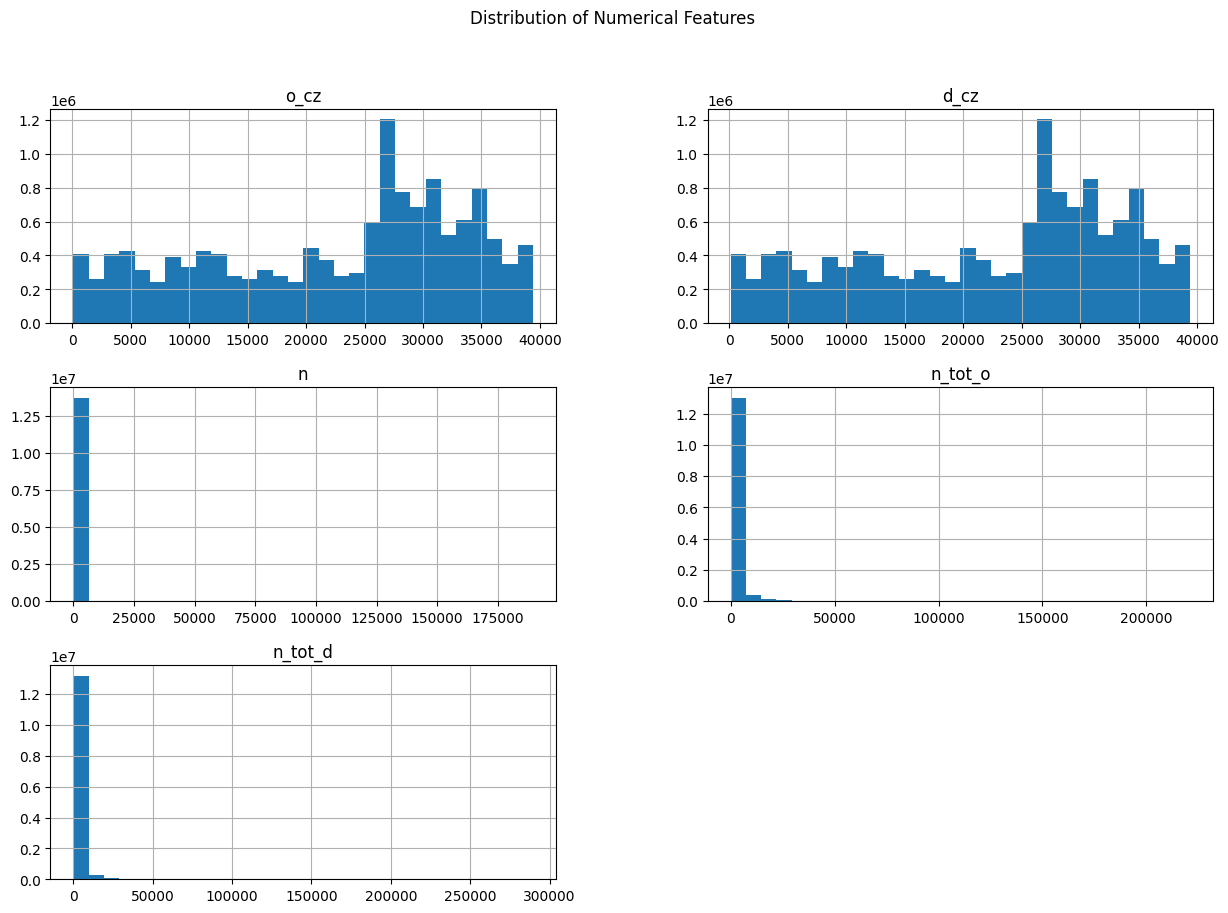


Time taken to run the code: 3.31 seconds


In [31]:
start_time = time.time()
num_cols = ['o_cz', 'd_cz', 'n', 'n_tot_o', 'n_tot_d']
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: 1696.87
CPU times: user 1.2 s, sys: 116 ms, total: 1.32 s
Wall time: 1.31 s


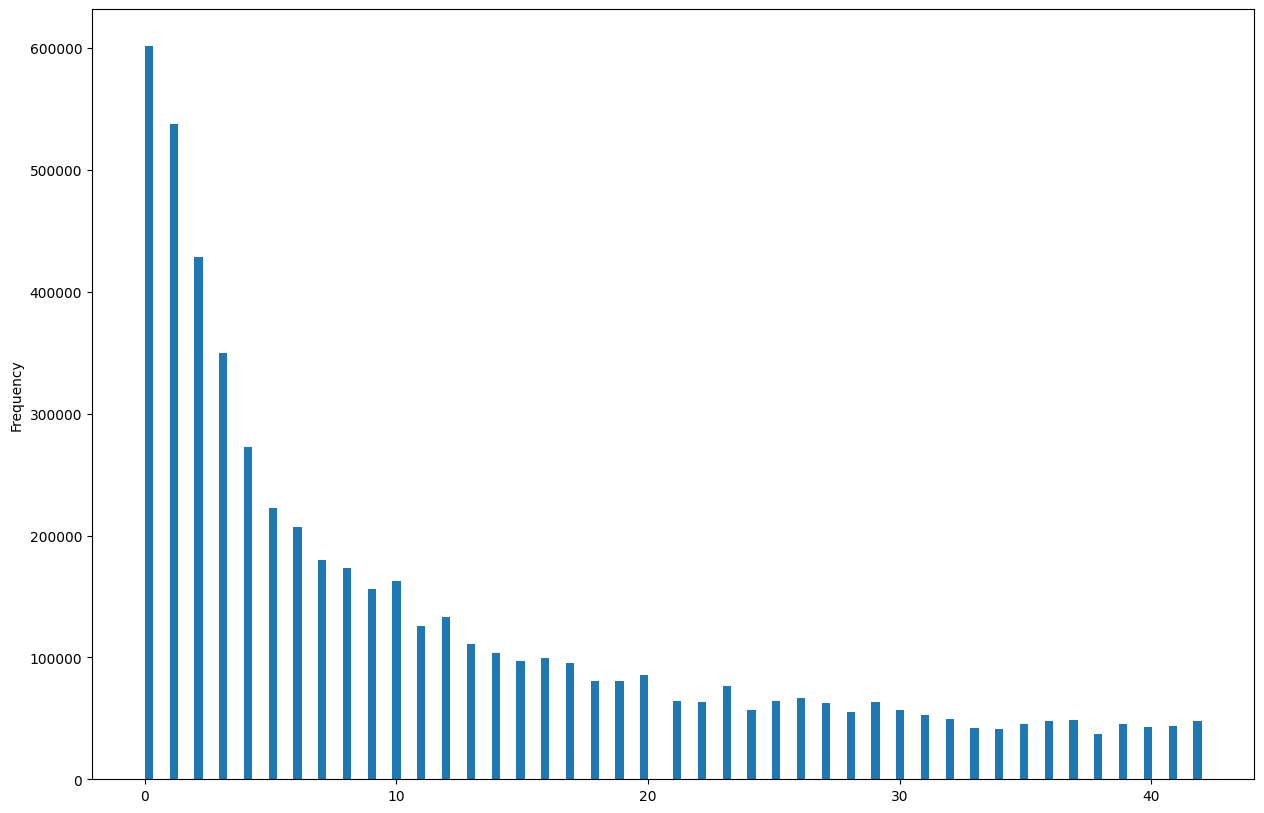

In [32]:
# Calculate the mean of the total number of individuals who live in destination d
mean_total_destination_d = df['n_tot_d'].mean()
print(f'Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: {mean_total_destination_d:.2f}')

# Plot a histogram of the total number of individuals who live in destination d
%time df['n_tot_d'].plot(kind='hist', bins=128, figsize=(15, 10), range=[0, 42])
plt.show()
